In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import os
from subprocess import check_call

from datetime import datetime
from pathlib import Path

import roms_tools as rt

import config
import cson_forge

## Define the grid

Specify the grid name and parameters defining its geometry and MPI domain decomposition.

In [47]:
model_name = "roms-marbl.no-tides"
grid_name = "wio-toy"

start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 2, 1)

boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True, 
    }

np_eta = 5 # number of partitions in eta (y) 
np_xi = 2 # number of partitions in xi (x) 

grid_kwargs = dict(
    nx=20,           # number of grid points in x-direction
    ny=20,           # number of grid points in y-direction
    N=10,             # number of vertical layers
    size_x=8000,       # domain size in x-direction (km)
    size_y=8000,       # domain size in y-direction (km)
    center_lon=60.0,    # center longitude (E)
    center_lat=-4.0,    # center latitude (S)
    rot=0,            # no rotation
)

ocn = cson_forge.OcnModel(
    model_name=model_name,
    grid_name=grid_name,
    grid_kwargs=grid_kwargs,
    boundaries=boundaries,    
    start_time=start_time,
    end_time=end_time,
    np_eta=np_eta,
    np_xi=np_xi,
)
ocn.spec.datasets

['GLORYS_REGIONAL', 'UNIFIED_BGC']

In [46]:
ocn.end_time

datetime.datetime(2012, 2, 1, 0, 0)

['GLORYS_REGIONAL', 'UNIFIED_BGC']

In [5]:
%%time
# TODO: add CDR forcing
roms_in = model_config.gen_inputs(
    grid_name=grid_name,
    grid=grid,
    roms_input_list=[
        "grd",
        "ic",
        "frc",
        "frc_bgc",
        "bry",
        "bry_bgc",
        "rivers",
    ],
    start_time=start_time,
    end_time=end_time,
    np_eta=np_eta,
    np_xi=np_xi,
    boundaries=boundaries,
    source_data=source_data,
    clobber=True,
)

2025-11-18 00:31:41 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_grd.nc
2025-11-18 00:31:41 - INFO - Sea surface height will NOT be used to adjust depth coordinates.


⚠️  Clobber=True: removing 99 existing .nc files in /Users/mclong/cson-forge-data/input_data/wio-toy...

▶️  [1/8] Writing ROMS grid...

▶️  [2/8] Generating initial conditions...


2025-11-18 00:31:46 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_ic.nc


[#################################       ] | 82% Completed | 2.68 s ms

/Users/mclong/miniconda3/envs/romstools-test/lib/python3.13/site-packages/dask/array/reductions.py:325: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


[########################################] | 100% Completed | 23.82 s


2025-11-18 00:32:10 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.



▶️  [3/8] Generating surface forcing (physics)...


2025-11-18 00:33:36 - INFO - Data will be interpolated onto the fine grid. Remember to set `interp_frc = 0` in your `bulk_frc.opt` ROMS option file.
2025-11-18 00:33:49 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_frc_201201.nc
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_frc_201202.nc


[########################################] | 100% Completed | 230.75 s
[########################################] | 100% Completed | 977.82 ms

▶️  [4/8] Generating surface forcing (BGC)...


2025-11-18 00:37:54 - INFO - Data will be interpolated onto the fine grid. Remember to set `interp_frc = 0` in your `bgc.opt` ROMS option file.
2025-11-18 00:37:54 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_frc_bgc_clim.nc


[########################################] | 100% Completed | 111.67 ms


2025-11-18 00:37:54 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [5/8] Generating boundary forcing (physics)...


2025-11-18 00:38:01 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_bry_201201.nc
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_bry_201202.nc


[########################################] | 100% Completed | 31.38 s
[########################################] | 100% Completed | 559.21 ms


2025-11-18 00:38:34 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [6/8] Generating boundary forcing (BGC)...


2025-11-18 00:38:36 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_bry_bgc_clim.nc


[########################################] | 100% Completed | 9.81 ss

▶️  [7/8] Generating river forcing...


2025-11-18 00:38:47 - INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
2025-11-18 00:38:47 - INFO - Compute climatology for river forcing.
2025-11-18 00:38:47 - INFO - Creating 14 synthetic river(s) to handle overlapping entries.
2025-11-18 00:38:47 - WARNING - NaNs detected in 'river_volume' and set to zero. This may indicate missing river data and affect model accuracy. 
2025-11-18 00:38:47 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input_data/wio-toy/roms_rivers.nc



▶️  [8/8] Partitioning input files across tiles...

✅ All input files generated and partitioned.

📄  Wrote ROMSInputs blueprint to /Users/mclong/codes/cson-forge/workflows/blueprints/model-inputs_wio-toy.yml
CPU times: user 5min 44s, sys: 2min 40s, total: 8min 25s
Wall time: 7min 7s


### Quick look at some forcing

[########################################] | 100% Completed | 6.58 sms


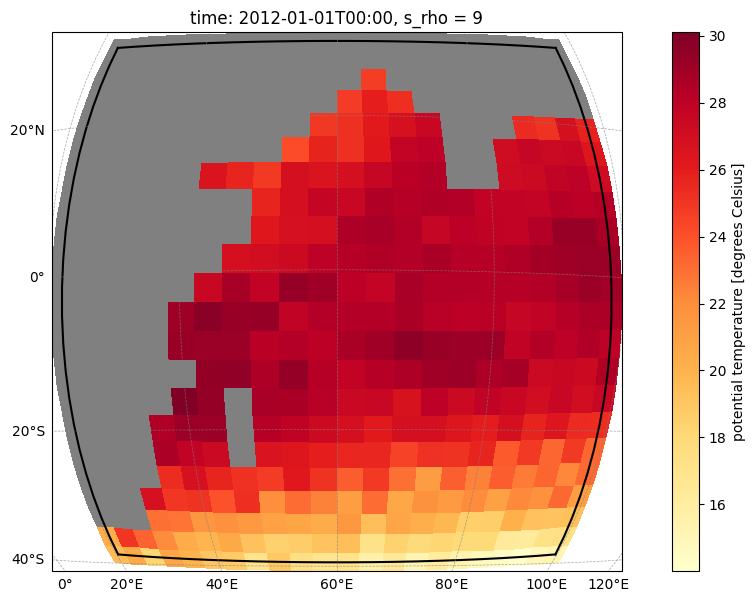

In [6]:
roms_in.input_objs["ic"].obj.plot("temp", s=-1)

[########################################] | 100% Completed | 536.76 ms


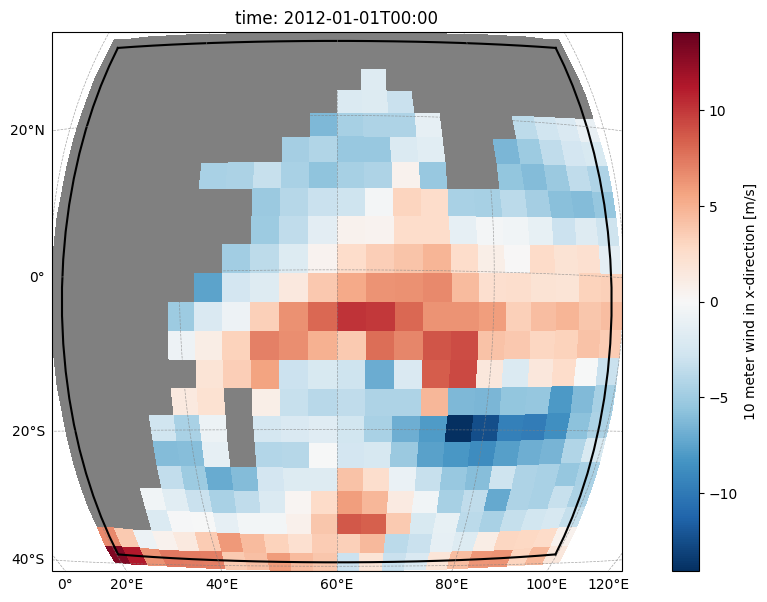

In [7]:
roms_in.input_objs["frc"].obj.plot("uwnd", time=0)

## Build the model

Apply templating to source code and input files, then build the model

In [8]:
# apply templating engine to replace vars
parameters = {
    "param.opt": dict(NP_XI=np_xi, NP_ETA=np_eta),
    "river_frc.opt": dict(nriv=89), #roms_in.input_objs["rivers"].obj.ds.sizes["nriver"]),
    "roms.in": dict(), # TODO: build from roms_in
    "cdr_frc.opt": dict(), # TODO: build from roms_in
}

model_build.build(grid_name, parameters, clean=False)

Build token: 20251118T003859Z-e79dc892
Building roms-marbl for grid: wio-toy
roms-marbl opt_base_dir : /Users/mclong/codes/cson-forge/workflows/model-configs/opt_base/opt_base_roms-marbl-cson-default
ROMS opt_dir      : /Users/mclong/codes/cson-forge/workflows/model-configs/opt/opt_roms-marbl-wio-toy
ROMS build_dir    : /Users/mclong/codes/cson-forge/workflows/model-configs/bld/bld_roms-marbl-wio-toy
Input data path   : /Users/mclong/cson-forge-data/input_data/wio-toy
ROMS_ROOT         : /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL_ROOT        : /Users/mclong/cson-forge-data/codes/MARBL
Conda env         : roms_env
Logs              : /Users/mclong/codes/cson-forge/workflows/model-configs/bld/tmp_bld_roms-marbl-wio-toy/logs
Conda env 'roms_env' already exists.
Using compiler kind: gnu
Found 4 existing build(s) in /Users/mclong/codes/cson-forge/workflows/builds.yml.
Matching build found: token=20251118T002915Z-598ac017
  -> recorded exe does not exist on filesystem: /Users/mclong

PosixPath('/Users/mclong/codes/cson-forge/workflows/model-configs/exe/roms-marbl-wio-toy-20251118T003859Z-e79dc892')